<a href="https://colab.research.google.com/github/aasthadawar02/TME_6015/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from keras.layers import Input, Dense, Reshape, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
input_img = Input(shape=(32, 32, 3))
x = Reshape((32*32*3,))(input_img)
x = Dense(32, activation='relu')(x)
encoded = Dense(16, activation='relu')(x)
x = Dense(32, activation='relu')(encoded)
x = Dense(32*32*3, activation='sigmoid')(x)
decoded = Reshape((32, 32, 3))(x)
autoencoder = Model(input_img, decoded)

In [5]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), loss='mse')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 reshape (Reshape)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 32)                98336     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 3072)              101376    
                                                                 
 reshape_1 (Reshape)         (None, 32, 32, 3)         0     

In [6]:
autoencoder.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=20, batch_size=32)

Epoch 1/20
1563/1563 [==============================] - 13s 4ms/step - loss: 0.0386 - val_loss: 0.0374
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0375 - val_loss: 0.0373
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0375 - val_loss: 0.0373
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0375 - val_loss: 0.0377
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0375 - val_loss: 0.0373
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0375 - val_loss: 0.0381
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0375 - val_loss: 0.0376
Epoch 8/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0375 - val_loss: 0.0378
Epoch 9/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0375 - val_loss: 0.0378
Epoch 10/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.03

In [7]:
def calculate_reconstruction_losses(original, reconstructed):
    mse_loss = tf.keras.losses.mean_squared_error(original.flatten(), reconstructed.flatten()).numpy()
    bce_loss = tf.keras.losses.binary_crossentropy(original.flatten(), reconstructed.flatten()).numpy()
    return mse_loss, bce_loss

In [8]:
x_pred = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


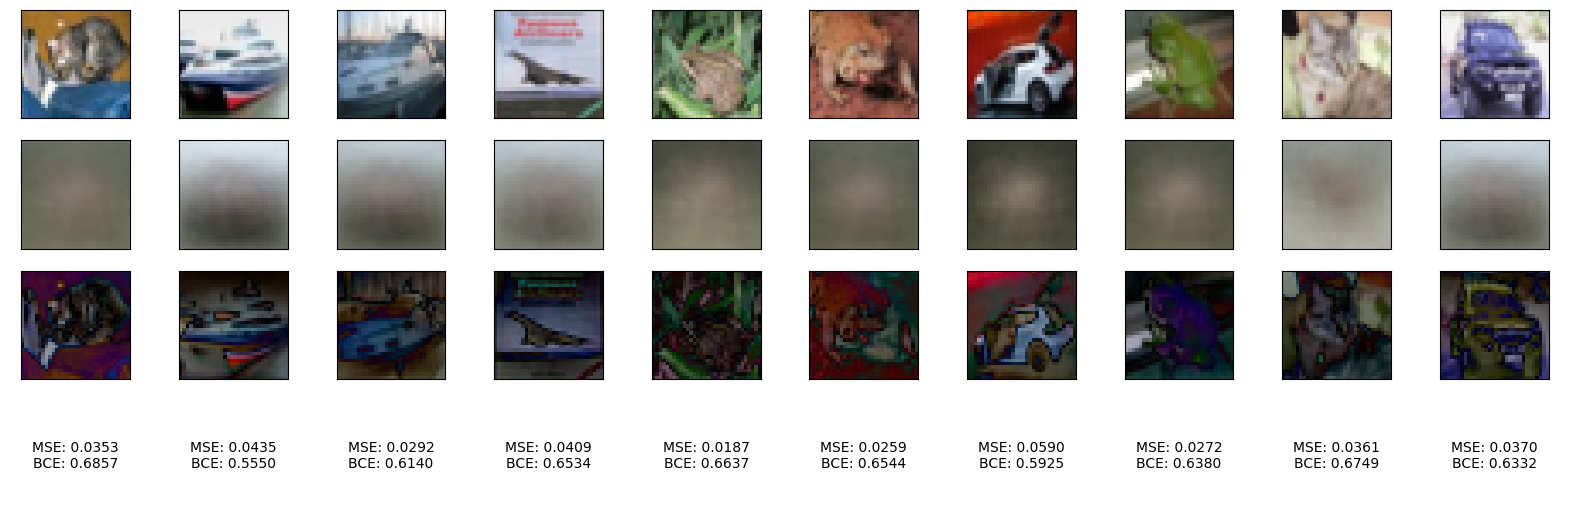

In [9]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 6 + 0.5))  # Adjust the figure size to accommodate three rows
for i in range(n):
    # Display original
    ax = plt.subplot(4, n, i + 1)
    original_img = x_test[i]
    plt.imshow(original_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(4, n, i + 1 + n)
    reconstructed_img = x_pred[i]
    plt.imshow(reconstructed_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display difference
    ax = plt.subplot(4, n, i + 1 + n * 2)
    difference = np.abs(original_img - reconstructed_img)
    plt.imshow(difference)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Calculate losses
    mse_loss, bce_loss = calculate_reconstruction_losses(original_img, reconstructed_img)

    # Add captions with losses
    ax = plt.subplot(4, n, i + 1 + n * 3)
    plt.axis('off')
    loss_caption = f"MSE: {mse_loss:.4f}\nBCE: {bce_loss:.4f}"
    plt.text(0.5, 0.5, loss_caption, ha='center', va='center', fontsize=10, transform=ax.transAxes)

plt.show()

In [10]:
learning_rates = [0.01, 0.02]
latent_dims = [8, 16]
best_loss = float('inf')
best_parameters = {}
for l_r in learning_rates:
  for latent_dim in latent_dims:
    input_img = Input(shape=(32, 32, 3))
    x = Reshape((32*32*3,))(input_img)
    x = Dense(32, activation='relu')(x)
    encoded = Dense(latent_dim, activation='relu')(x)
    x = Dense(32, activation='relu')(encoded)
    x = Dense(32*32*3, activation='sigmoid')(x)
    decoded = Reshape((32, 32, 3))(x)
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=l_r), loss='mse')
    autoencoder.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=20, batch_size=64)
    test_loss = autoencoder.evaluate(x_test, x_test)
    if test_loss < best_loss:
      best_loss = test_loss
      best_parameters['learning_rate'], best_parameters['latent_space_dimension'] = l_r, latent_dim
    print("="*30)

print("Best Parameters: ", best_parameters)




Epoch 1/20
782/782 [==============================] - 6s 7ms/step - loss: 0.0357 - val_loss: 0.0330
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0330 - val_loss: 0.0329
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0328 - val_loss: 0.0327
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0328 - val_loss: 0.0330
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0328 - val_loss: 0.0333
Epoch 6/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0328 - val_loss: 0.0333
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0328 - val_loss: 0.0326
Epoch 8/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0328 - val_loss: 0.0325
Epoch 9/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0328 - val_loss: 0.0327
Epoch 10/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0327 - val_loss: 0.0339

In [11]:
l_r, latent_dim = best_parameters['learning_rate'], best_parameters['latent_space_dimension']

In [12]:
input_img = Input(shape=(32, 32, 3))
x = Reshape((32*32*3,))(input_img)
x = Dense(32, activation='relu')(x)
encoded = Dense(latent_dim, activation='relu')(x)
x = Dense(32, activation='relu')(encoded)
x = Dense(32*32*3, activation='sigmoid')(x)
decoded = Reshape((32, 32, 3))(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=l_r), loss='mse')
autoencoder.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=20, batch_size=64)


Epoch 1/20
782/782 [==============================] - 6s 6ms/step - loss: 0.0388 - val_loss: 0.0371
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0371 - val_loss: 0.0371
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0370 - val_loss: 0.0371
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0370 - val_loss: 0.0370
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0370 - val_loss: 0.0371
Epoch 6/20
782/782 [==============================] - 4s 4ms/step - loss: 0.0370 - val_loss: 0.0372
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0370 - val_loss: 0.0370
Epoch 8/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0370 - val_loss: 0.0369
Epoch 9/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0370 - val_loss: 0.0372
Epoch 10/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0370 - val_loss: 0.0370

In [13]:
test_loss = autoencoder.evaluate(x_test, x_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0370


In [14]:
x_pred = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


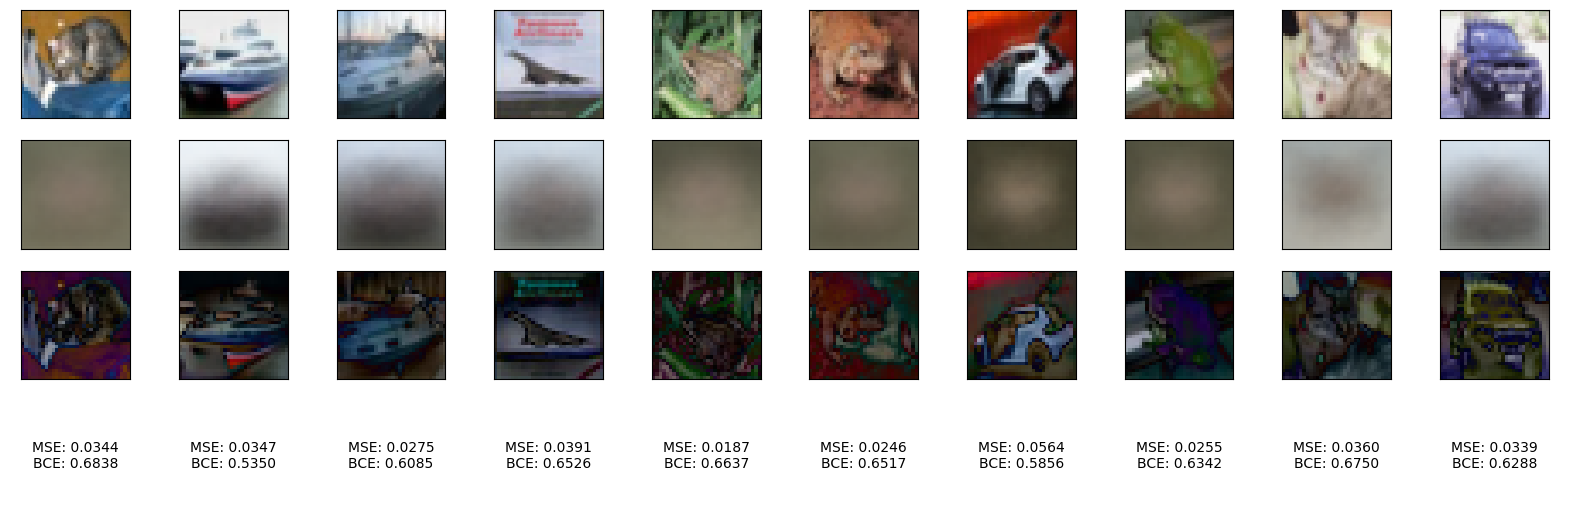

In [15]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 6 + 0.5))  # Adjust the figure size to accommodate three rows
for i in range(n):
    # Display original
    ax = plt.subplot(4, n, i + 1)
    original_img = x_test[i]
    plt.imshow(original_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(4, n, i + 1 + n)
    reconstructed_img = x_pred[i]
    plt.imshow(reconstructed_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display difference
    ax = plt.subplot(4, n, i + 1 + n * 2)
    difference = np.abs(original_img - reconstructed_img)
    plt.imshow(difference)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Calculate losses
    mse_loss, bce_loss = calculate_reconstruction_losses(original_img, reconstructed_img)

    # Add captions with losses
    ax = plt.subplot(4, n, i + 1 + n * 3)
    plt.axis('off')
    loss_caption = f"MSE: {mse_loss:.4f}\nBCE: {bce_loss:.4f}"
    plt.text(0.5, 0.5, loss_caption, ha='center', va='center', fontsize=10, transform=ax.transAxes)

plt.show()

In [16]:
# Hyperparameters
batch_size = 64
original_dim = 3072  # 32*32*3
latent_dim = 2
intermediate_dim = 256
epochs = 20
epsilon_std = 1.0

# Encoder network
x = Input(shape=(original_dim,), name='input')
h = Dense(intermediate_dim, activation='relu', name='encoding')(x)
z_mean = Dense(latent_dim, name='mean')(h)
z_log_var = Dense(latent_dim, name='log-variance')(h)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

# Sample from the latent distribution
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder network
decoder_h = Dense(intermediate_dim, activation='relu', name='decoder_h')
decoder_mean = Dense(original_dim, activation='sigmoid', name='decoder_mean')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# VAE model
vae = Model(x, x_decoded_mean)

# Loss function: reconstruction loss + KL divergence
reconstruction_loss = binary_crossentropy(x, x_decoded_mean) * original_dim
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer=Adam())

In [17]:
vae_x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
vae_x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [18]:
vae.fit(vae_x_train, vae_x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(vae_x_test, vae_x_test))

Epoch 1/20
782/782 [==============================] - 8s 7ms/step - loss: 1983.9425 - val_loss: 1964.0741
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 1961.8726 - val_loss: 1962.8608
Epoch 3/20
782/782 [==============================] - 4s 5ms/step - loss: 1960.3951 - val_loss: 1961.8527
Epoch 4/20
782/782 [==============================] - 5s 6ms/step - loss: 1959.0925 - val_loss: 1960.6351
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 1958.2378 - val_loss: 1963.6366
Epoch 6/20
782/782 [==============================] - 4s 5ms/step - loss: 1957.5737 - val_loss: 1959.5266
Epoch 7/20
782/782 [==============================] - 5s 6ms/step - loss: 1956.7313 - val_loss: 1958.7303
Epoch 8/20
782/782 [==============================] - 5s 6ms/step - loss: 1955.7618 - val_loss: 1958.9198
Epoch 9/20
782/782 [==============================] - 4s 5ms/step - loss: 1954.7395 - val_loss: 1955.8904
Epoch 10/20
782/782 [=========================

In [27]:
vae_x_test_pred = vae.predict(vae_x_test)

313/313 [==============================] - 1s 3ms/step


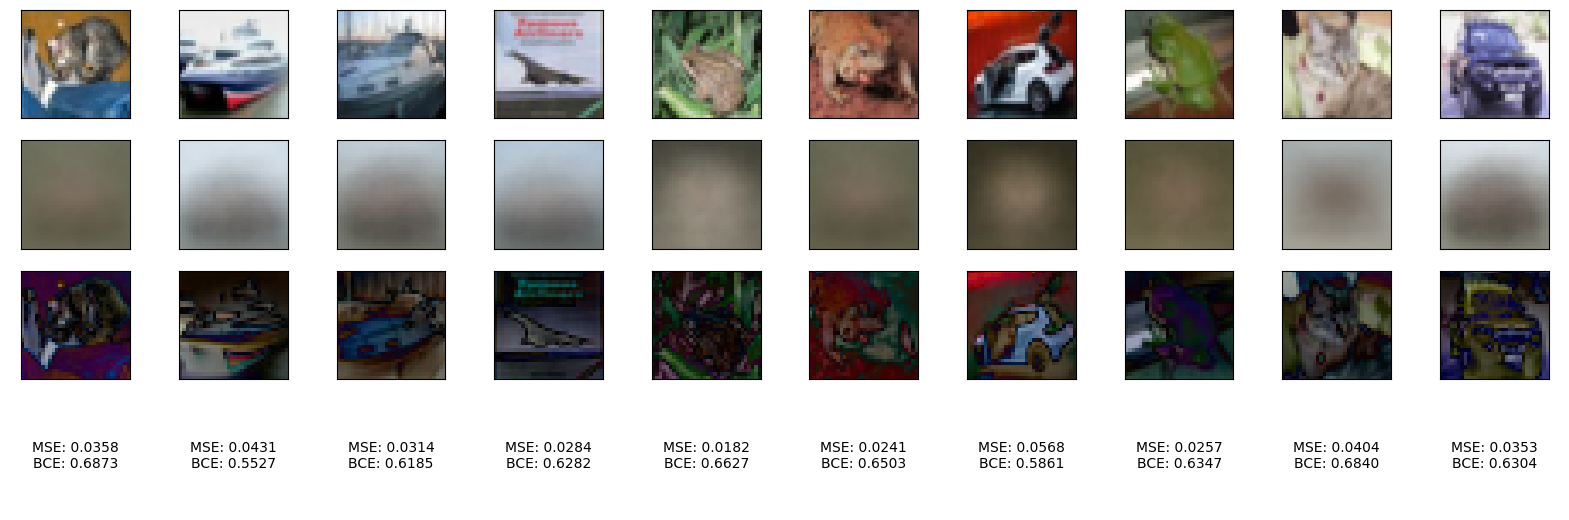

In [21]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 6 + 0.5))  # Adjust the figure size to accommodate three rows
for i in range(n):
    # Display original
    ax = plt.subplot(4, n, i + 1)
    original_img = vae_x_test[i].reshape(32,32,3)
    plt.imshow(original_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(4, n, i + 1 + n)
    reconstructed_img = vae_x_test_pred[i].reshape(32,32,3)
    plt.imshow(reconstructed_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display difference
    ax = plt.subplot(4, n, i + 1 + n * 2)
    difference = np.abs(original_img - reconstructed_img)
    plt.imshow(difference)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Calculate losses
    mse_loss, bce_loss = calculate_reconstruction_losses(original_img, reconstructed_img)

    # Add captions with losses
    ax = plt.subplot(4, n, i + 1 + n * 3)
    plt.axis('off')
    loss_caption = f"MSE: {mse_loss:.4f}\nBCE: {bce_loss:.4f}"
    plt.text(0.5, 0.5, loss_caption, ha='center', va='center', fontsize=10, transform=ax.transAxes)

plt.show()

In [22]:
latent_dims = [2,4]
intermediate_dims = [128, 256]
best_loss = float('inf')
best_parameters = {}

for latent_dim in latent_dims:
  for intermediate_dim in intermediate_dims:
    # Hyperparameters
    batch_size = 64
    original_dim = 3072  # 32*32*3
    epochs = 20
    epsilon_std = 1.0

    # Encoder network
    x = Input(shape=(original_dim,), name='input')
    h = Dense(intermediate_dim, activation='relu', name='encoding')(x)
    z_mean = Dense(latent_dim, name='mean')(h)
    z_log_var = Dense(latent_dim, name='log-variance')(h)

    # Sampling function
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=epsilon_std)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    # Sample from the latent distribution
    z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # Decoder network
    decoder_h = Dense(intermediate_dim, activation='relu', name='decoder_h')
    decoder_mean = Dense(original_dim, activation='sigmoid', name='decoder_mean')
    h_decoded = decoder_h(z)
    x_decoded_mean = decoder_mean(h_decoded)

    # VAE model
    vae = Model(x, x_decoded_mean)

    # Loss function: reconstruction loss + KL divergence
    reconstruction_loss = binary_crossentropy(x, x_decoded_mean) * original_dim
    kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    vae_loss = K.mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)
    vae.compile(optimizer=Adam())
    vae_x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    vae_x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
    vae.fit(vae_x_train, vae_x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(vae_x_test, vae_x_test))
    test_loss = vae.evaluate(vae_x_test, vae_x_test)
    if test_loss < best_loss:
      best_loss = test_loss
      best_parameters['latent_dim'], best_parameters['intermediate_dim'] = latent_dim, intermediate_dim
    print("="*30)

print("Best Parameters: ", best_parameters)




Epoch 1/20
782/782 [==============================] - 8s 7ms/step - loss: 1987.9087 - val_loss: 1964.5751
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 1961.1207 - val_loss: 1965.6973
Epoch 3/20
782/782 [==============================] - 4s 6ms/step - loss: 1959.8103 - val_loss: 1963.0233
Epoch 4/20
782/782 [==============================] - 5s 6ms/step - loss: 1958.8945 - val_loss: 1962.3951
Epoch 5/20
782/782 [==============================] - 5s 6ms/step - loss: 1958.4115 - val_loss: 1960.8583
Epoch 6/20
782/782 [==============================] - 8s 11ms/step - loss: 1957.6566 - val_loss: 1959.9614
Epoch 7/20
782/782 [==============================] - 6s 8ms/step - loss: 1957.5479 - val_loss: 1962.1516
Epoch 8/20
782/782 [==============================] - 4s 5ms/step - loss: 1957.2045 - val_loss: 1961.0891
Epoch 9/20
782/782 [==============================] - 5s 6ms/step - loss: 1956.8605 - val_loss: 1961.1049
Epoch 10/20
782/782 [========================

In [23]:
 latent_dim, intermediate_dim = best_parameters['latent_dim'], best_parameters['intermediate_dim']

In [24]:
# Hyperparameters
batch_size = 64
original_dim = 3072  # 32*32*3
epochs = 20
epsilon_std = 1.0

# Encoder network
x = Input(shape=(original_dim,), name='input')
h = Dense(intermediate_dim, activation='relu', name='encoding')(x)
z_mean = Dense(latent_dim, name='mean')(h)
z_log_var = Dense(latent_dim, name='log-variance')(h)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

# Sample from the latent distribution
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder network
decoder_h = Dense(intermediate_dim, activation='relu', name='decoder_h')
decoder_mean = Dense(original_dim, activation='sigmoid', name='decoder_mean')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# VAE model
vae = Model(x, x_decoded_mean)

# Loss function: reconstruction loss + KL divergence
reconstruction_loss = binary_crossentropy(x, x_decoded_mean) * original_dim
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer=Adam())


In [25]:
vae_x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
vae_x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [26]:
vae.fit(vae_x_train, vae_x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(vae_x_test, vae_x_test))

Epoch 1/20
782/782 [==============================] - 7s 6ms/step - loss: 1962.0073 - val_loss: 1929.3137
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 1924.3550 - val_loss: 1925.6345
Epoch 3/20
782/782 [==============================] - 5s 7ms/step - loss: 1922.2361 - val_loss: 1924.9365
Epoch 4/20
782/782 [==============================] - 5s 7ms/step - loss: 1920.2014 - val_loss: 1922.8413
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 1919.0222 - val_loss: 1919.0527
Epoch 6/20
782/782 [==============================] - 5s 7ms/step - loss: 1917.3269 - val_loss: 1921.0758
Epoch 7/20
782/782 [==============================] - 5s 6ms/step - loss: 1916.5402 - val_loss: 1919.1663
Epoch 8/20
782/782 [==============================] - 4s 5ms/step - loss: 1915.6063 - val_loss: 1918.1210
Epoch 9/20
782/782 [==============================] - 5s 6ms/step - loss: 1914.8997 - val_loss: 1916.3523
Epoch 10/20
782/782 [=========================

In [28]:
vae_x_test_pred = vae.predict(vae_x_test)

313/313 [==============================] - 1s 2ms/step


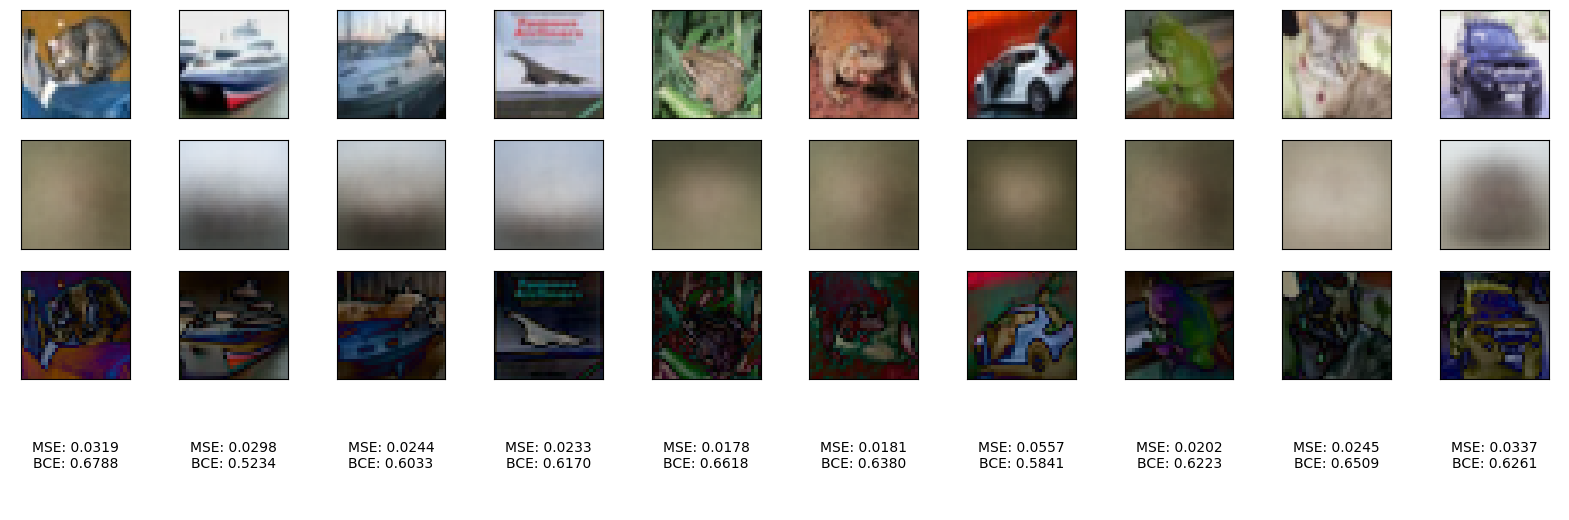

In [29]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 6 + 0.5))  # Adjust the figure size to accommodate three rows
for i in range(n):
    # Display original
    ax = plt.subplot(4, n, i + 1)
    original_img = vae_x_test[i].reshape(32,32,3)
    plt.imshow(original_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(4, n, i + 1 + n)
    reconstructed_img = vae_x_test_pred[i].reshape(32,32,3)
    plt.imshow(reconstructed_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display difference
    ax = plt.subplot(4, n, i + 1 + n * 2)
    difference = np.abs(original_img - reconstructed_img)
    plt.imshow(difference)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Calculate losses
    mse_loss, bce_loss = calculate_reconstruction_losses(original_img, reconstructed_img)

    # Add captions with losses
    ax = plt.subplot(4, n, i + 1 + n * 3)
    plt.axis('off')
    loss_caption = f"MSE: {mse_loss:.4f}\nBCE: {bce_loss:.4f}"
    plt.text(0.5, 0.5, loss_caption, ha='center', va='center', fontsize=10, transform=ax.transAxes)

plt.show()